In [1]:
# Image Preprocessing with CLAHE (Contrast Limited Adaptive Histogram Equalization)
# Import required libraries

import cv2
import numpy as np
import pandas as pd
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil
import time
from datetime import datetime

print("All required libraries imported successfully!")
print("OpenCV version:", cv2.__version__)
print("NumPy version:", np.__version__)

All required libraries imported successfully!
OpenCV version: 4.12.0
NumPy version: 2.0.1


In [2]:
# Define paths and explore directory structure
base_path = "./kaggle/input/data/"
output_base_path = "./processed_images/data"

# Function to explore and count images in all directories
def explore_image_directories():
    total_images = 0
    directory_info = []
    
    # Look for all images_xxx directories
    image_dirs = glob.glob(os.path.join(base_path, "images_*"))
    image_dirs.sort()  # Sort to get consistent ordering
    
    print(f"Found {len(image_dirs)} image directories:")
    
    for img_dir in image_dirs:
        dir_name = os.path.basename(img_dir)
        images_path = os.path.join(img_dir, "images")
        
        if os.path.exists(images_path):
            # Count PNG files in this directory
            png_files = glob.glob(os.path.join(images_path, "*.png"))
            count = len(png_files)
            total_images += count
            
            directory_info.append({
                'directory': dir_name,
                'path': images_path,
                'image_count': count
            })
            
            print(f"  {dir_name}: {count} images")
            
            # Show first few image names as examples
            if png_files:
                print(f"    Examples: {[os.path.basename(f) for f in png_files[:3]]}")
        else:
            print(f"  {dir_name}: No 'images' subfolder found")
    
    print(f"\nTotal images found: {total_images}")
    return directory_info, total_images

# Explore the directory structure
dir_info, total_count = explore_image_directories()

Found 12 image directories:
  images_001: 4999 images
    Examples: ['00000001_000.png', '00000001_001.png', '00000001_002.png']
  images_002: 10000 images
    Examples: ['00001336_000.png', '00001337_000.png', '00001338_000.png']
  images_003: 10000 images
    Examples: ['00003923_014.png', '00003923_015.png', '00003923_016.png']
  images_004: 10000 images
    Examples: ['00006585_007.png', '00006585_008.png', '00006585_009.png']
  images_005: 10000 images
    Examples: ['00009232_004.png', '00009232_005.png', '00009232_006.png']
  images_006: 10000 images
    Examples: ['00011558_008.png', '00011558_009.png', '00011558_010.png']
  images_007: 10000 images
    Examples: ['00013774_026.png', '00013774_027.png', '00013774_028.png']
  images_008: 10000 images
    Examples: ['00016051_010.png', '00016051_011.png', '00016051_012.png']
  images_009: 10000 images
    Examples: ['00018387_035.png', '00018387_036.png', '00018387_037.png']
  images_010: 10000 images
    Examples: ['00020945_050

Testing CLAHE preprocessing on a sample image...
Testing CLAHE on sample image: ./kaggle/input/data/images_001/images/00000001_000.png
Original image shape: (1024, 1024)
Original image range: [0, 255]
Processed image shape: (1024, 1024)
Processed image range: [1, 255]


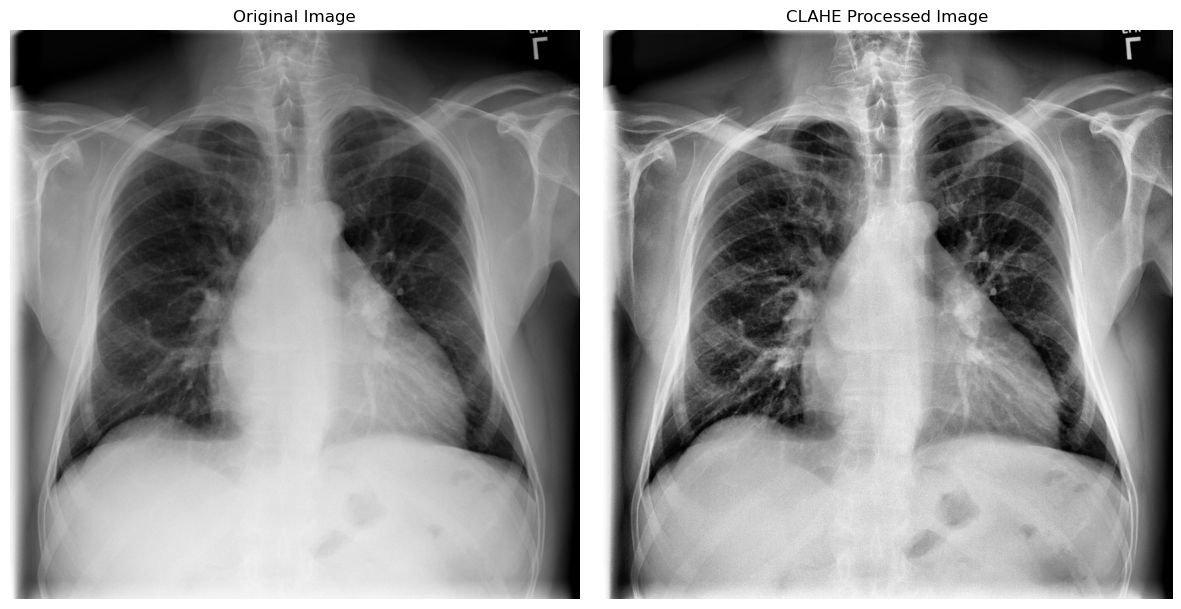

In [3]:
# CLAHE Preprocessing Function
def apply_clahe_preprocessing(image_path, clip_limit=2.0, tile_grid_size=(8, 8)):
    """
    Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to an image.
    
    Parameters:
    - image_path: Path to the input image
    - clip_limit: Threshold for contrast limiting (default: 2.0)
    - tile_grid_size: Size of the grid for histogram equalization (default: (8,8))
    
    Returns:
    - Processed image as numpy array
    """
    try:
        # Read the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if image is None:
            print(f"Error: Could not read image {image_path}")
            return None
        
        # Create CLAHE object
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        
        # Apply CLAHE
        clahe_image = clahe.apply(image)
        
        return clahe_image
        
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        return None

def save_processed_image(processed_image, output_path):
    """
    Save the processed image to the specified path.
    
    Parameters:
    - processed_image: Processed image array
    - output_path: Path where to save the image
    """
    try:
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        
        # Save the image
        cv2.imwrite(output_path, processed_image)
        return True
        
    except Exception as e:
        print(f"Error saving image to {output_path}: {str(e)}")
        return False

# Test the function with a sample image
def test_clahe_on_sample():
    # Get a sample image path
    sample_path = "./kaggle/input/data/images_001/images/00000001_000.png"
    
    if os.path.exists(sample_path):
        print(f"Testing CLAHE on sample image: {sample_path}")
        
        # Read original image
        original = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
        
        # Apply CLAHE
        processed = apply_clahe_preprocessing(sample_path)
        
        if processed is not None and original is not None:
            # Display some statistics
            print(f"Original image shape: {original.shape}")
            print(f"Original image range: [{original.min()}, {original.max()}]")
            print(f"Processed image shape: {processed.shape}")
            print(f"Processed image range: [{processed.min()}, {processed.max()}]")
            
            # Create a simple visualization
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            
            axes[0].imshow(original, cmap='gray')
            axes[0].set_title('Original Image')
            axes[0].axis('off')
            
            axes[1].imshow(processed, cmap='gray')
            axes[1].set_title('CLAHE Processed Image')
            axes[1].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            return True
        else:
            print("Failed to process sample image")
            return False
    else:
        print(f"Sample image not found at {sample_path}")
        return False

# Test the CLAHE function
print("Testing CLAHE preprocessing on a sample image...")
test_success = test_clahe_on_sample()

In [4]:
# Create output directory structure and batch processing function
def create_output_directories(directory_info):
    """
    Create the output directory structure mirroring the input structure.
    """
    print("Creating output directory structure...")
    
    for dir_info_item in directory_info:
        dir_name = dir_info_item['directory']
        output_dir = os.path.join(output_base_path, dir_name, "images")
        
        # Create directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        print(f"Created: {output_dir}")
    
    print("Output directories created successfully!")


def process_all_images_with_clahe(directory_info, clip_limit=2.0, tile_grid_size=(8, 8), sample_only=False, sample_count=100, per_image_feedback=False, feedback_interval=1):
    """
    Process all images with CLAHE and save to output directories.

    Parameters:
    - directory_info: List of directory information from exploration
    - clip_limit: CLAHE clip limit parameter
    - tile_grid_size: CLAHE tile grid size parameter
    - sample_only: If True, process only a sample of images for testing
    - sample_count: Number of images to process if sample_only=True
    - per_image_feedback: If True, print a single-line update each time an image is processed (no overall percentage)
    - feedback_interval: Only print every `feedback_interval` images to reduce spam when >1
    """
    
    print(f"Starting CLAHE processing...")
    print(f"Parameters: clip_limit={clip_limit}, tile_grid_size={tile_grid_size}")
    
    if sample_only:
        print(f"SAMPLE MODE: Processing only {sample_count} images for testing")
    
    total_processed = 0
    total_failed = 0
    global_processed = 0
    
    # Process each directory
    for dir_info_item in directory_info:
        dir_name = dir_info_item['directory']
        input_images_path = dir_info_item['path']
        output_images_path = os.path.join(output_base_path, dir_name, "images")
        
        print(f"\nProcessing {dir_name}...")
        
        # Get all PNG files in this directory
        png_files = glob.glob(os.path.join(input_images_path, "*.png"))
        
        if sample_only:
            # In sample mode, take only a few images from each directory
            sample_per_dir = min(sample_count // len(directory_info), len(png_files))
            png_files = png_files[:sample_per_dir]
            print(f"  Processing {len(png_files)} sample images from {dir_name}")
        else:
            print(f"  Processing {len(png_files)} images from {dir_name}")
        
        # Process each image
        for idx, img_path in enumerate(png_files, start=1):
            try:
                # Get the image filename
                img_filename = os.path.basename(img_path)
                
                # Define output path
                output_path = os.path.join(output_images_path, img_filename)
                
                # Skip if already processed (optional - remove this check if you want to reprocess)
                if os.path.exists(output_path):
                    total_failed += 0
                    if per_image_feedback and (global_processed % feedback_interval == 0):
                        print(f"Skipped (exists): {dir_name}/{img_filename}", end='\r')
                    continue
                
                # Apply CLAHE preprocessing
                processed_image = apply_clahe_preprocessing(img_path, clip_limit, tile_grid_size)
                
                if processed_image is not None:
                    # Save processed image
                    if save_processed_image(processed_image, output_path):
                        total_processed += 1
                        global_processed += 1
                        if per_image_feedback and (global_processed % feedback_interval == 0):
                            # single-line update (no overall percent) - good for logs
                            print(f"Processed {global_processed} images; last: {dir_name}/{img_filename}", end='\r', flush=True)
                    else:
                        total_failed += 1
                        if per_image_feedback:
                            print(f"Save failed: {dir_name}/{img_filename}")
                else:
                    total_failed += 1
                    if per_image_feedback:
                        print(f"Process failed: {dir_name}/{img_filename}")
                        
            except Exception as e:
                total_failed += 1
                if per_image_feedback:
                    print(f"Error: {str(e)[:200]}")
                continue
    
    # Ensure we end the single-line feedback with a newline so the next prints start fresh
    if per_image_feedback and global_processed > 0:
        print()
    
    print(f"\n{'='*50}")
    print(f"CLAHE Processing Complete!")
    print(f"Total images processed successfully: {total_processed}")
    print(f"Total images failed: {total_failed}")
    print(f"{'='*50}")
    
    return total_processed, total_failed

In [5]:
# Run CLAHE processing - Start with a sample to test
print("Starting with a sample run to test the processing pipeline...")
print("This will process a small number of images from each directory as a test.")

# Process a sample first (10 images per directory for testing)
sample_processed, sample_failed = process_all_images_with_clahe(
    directory_info=dir_info,
    clip_limit=2.0,           # Standard CLAHE clip limit
    tile_grid_size=(8, 8),    # Standard tile size for medical images
    sample_only=True,         # Test mode
    sample_count=120          # 10 images per directory (12 directories)
)

Starting with a sample run to test the processing pipeline...
This will process a small number of images from each directory as a test.
Starting CLAHE processing...
Parameters: clip_limit=2.0, tile_grid_size=(8, 8)
SAMPLE MODE: Processing only 120 images for testing

Processing images_001...
  Processing 10 sample images from images_001

Processing images_002...
  Processing 10 sample images from images_002

Processing images_003...
  Processing 10 sample images from images_003

Processing images_004...
  Processing 10 sample images from images_004

Processing images_003...
  Processing 10 sample images from images_003

Processing images_004...
  Processing 10 sample images from images_004

Processing images_005...
  Processing 10 sample images from images_005

Processing images_006...

Processing images_005...
  Processing 10 sample images from images_005

Processing images_006...
  Processing 10 sample images from images_006

Processing images_007...
  Processing 10 sample images fro

In [6]:
# Verify the sample processing results
def verify_processed_images():
    """
    Verify that the processed images were saved correctly.
    """
    print("Verifying processed images...")
    
    total_found = 0
    for dir_info_item in dir_info:
        dir_name = dir_info_item['directory']
        output_dir = os.path.join(output_base_path, dir_name, "images")
        
        if os.path.exists(output_dir):
            processed_files = glob.glob(os.path.join(output_dir, "*.png"))
            total_found += len(processed_files)
            print(f"  {dir_name}: {len(processed_files)} processed images found")
        else:
            print(f"  {dir_name}: Output directory not found!")
    
    print(f"\nTotal processed images found: {total_found}")
    return total_found

# Verify the sample results
verify_processed_images()

print("\n" + "="*60)
print("Sample processing completed successfully!")
print("The pipeline is working correctly.")
print("="*60)

Verifying processed images...
  images_001: 10 processed images found
  images_002: 10 processed images found
  images_003: 10 processed images found
  images_004: 10 processed images found
  images_005: 10 processed images found
  images_006: 10 processed images found
  images_007: 10 processed images found
  images_008: 10 processed images found
  images_009: 10 processed images found
  images_010: 10 processed images found
  images_011: 10 processed images found
  images_012: 10 processed images found

Total processed images found: 120

Sample processing completed successfully!
The pipeline is working correctly.


COMPREHENSIVE CLAHE ANALYSIS
Creating enhanced visualization with histograms...

images_001 - 00000001_000.png:
  Original: mean=128.1, std=67.4, range=[0, 255]
  CLAHE:    mean=134.4, std=65.2, range=[1, 255]
  Contrast improvement: 0.97x

images_001 - 00000001_000.png:
  Original: mean=128.1, std=67.4, range=[0, 255]
  CLAHE:    mean=134.4, std=65.2, range=[1, 255]
  Contrast improvement: 0.97x

images_002 - 00001336_000.png:
  Original: mean=155.7, std=58.7, range=[0, 243]
  CLAHE:    mean=149.9, std=63.5, range=[2, 248]
  Contrast improvement: 1.08x

images_003 - 00003923_014.png:

images_002 - 00001336_000.png:
  Original: mean=155.7, std=58.7, range=[0, 243]
  CLAHE:    mean=149.9, std=63.5, range=[2, 248]
  Contrast improvement: 1.08x

images_003 - 00003923_014.png:
  Original: mean=137.5, std=40.8, range=[0, 255]
  CLAHE:    mean=142.4, std=41.5, range=[1, 255]
  Contrast improvement: 1.02x
  Original: mean=137.5, std=40.8, range=[0, 255]
  CLAHE:    mean=142.4, std=41.5, range

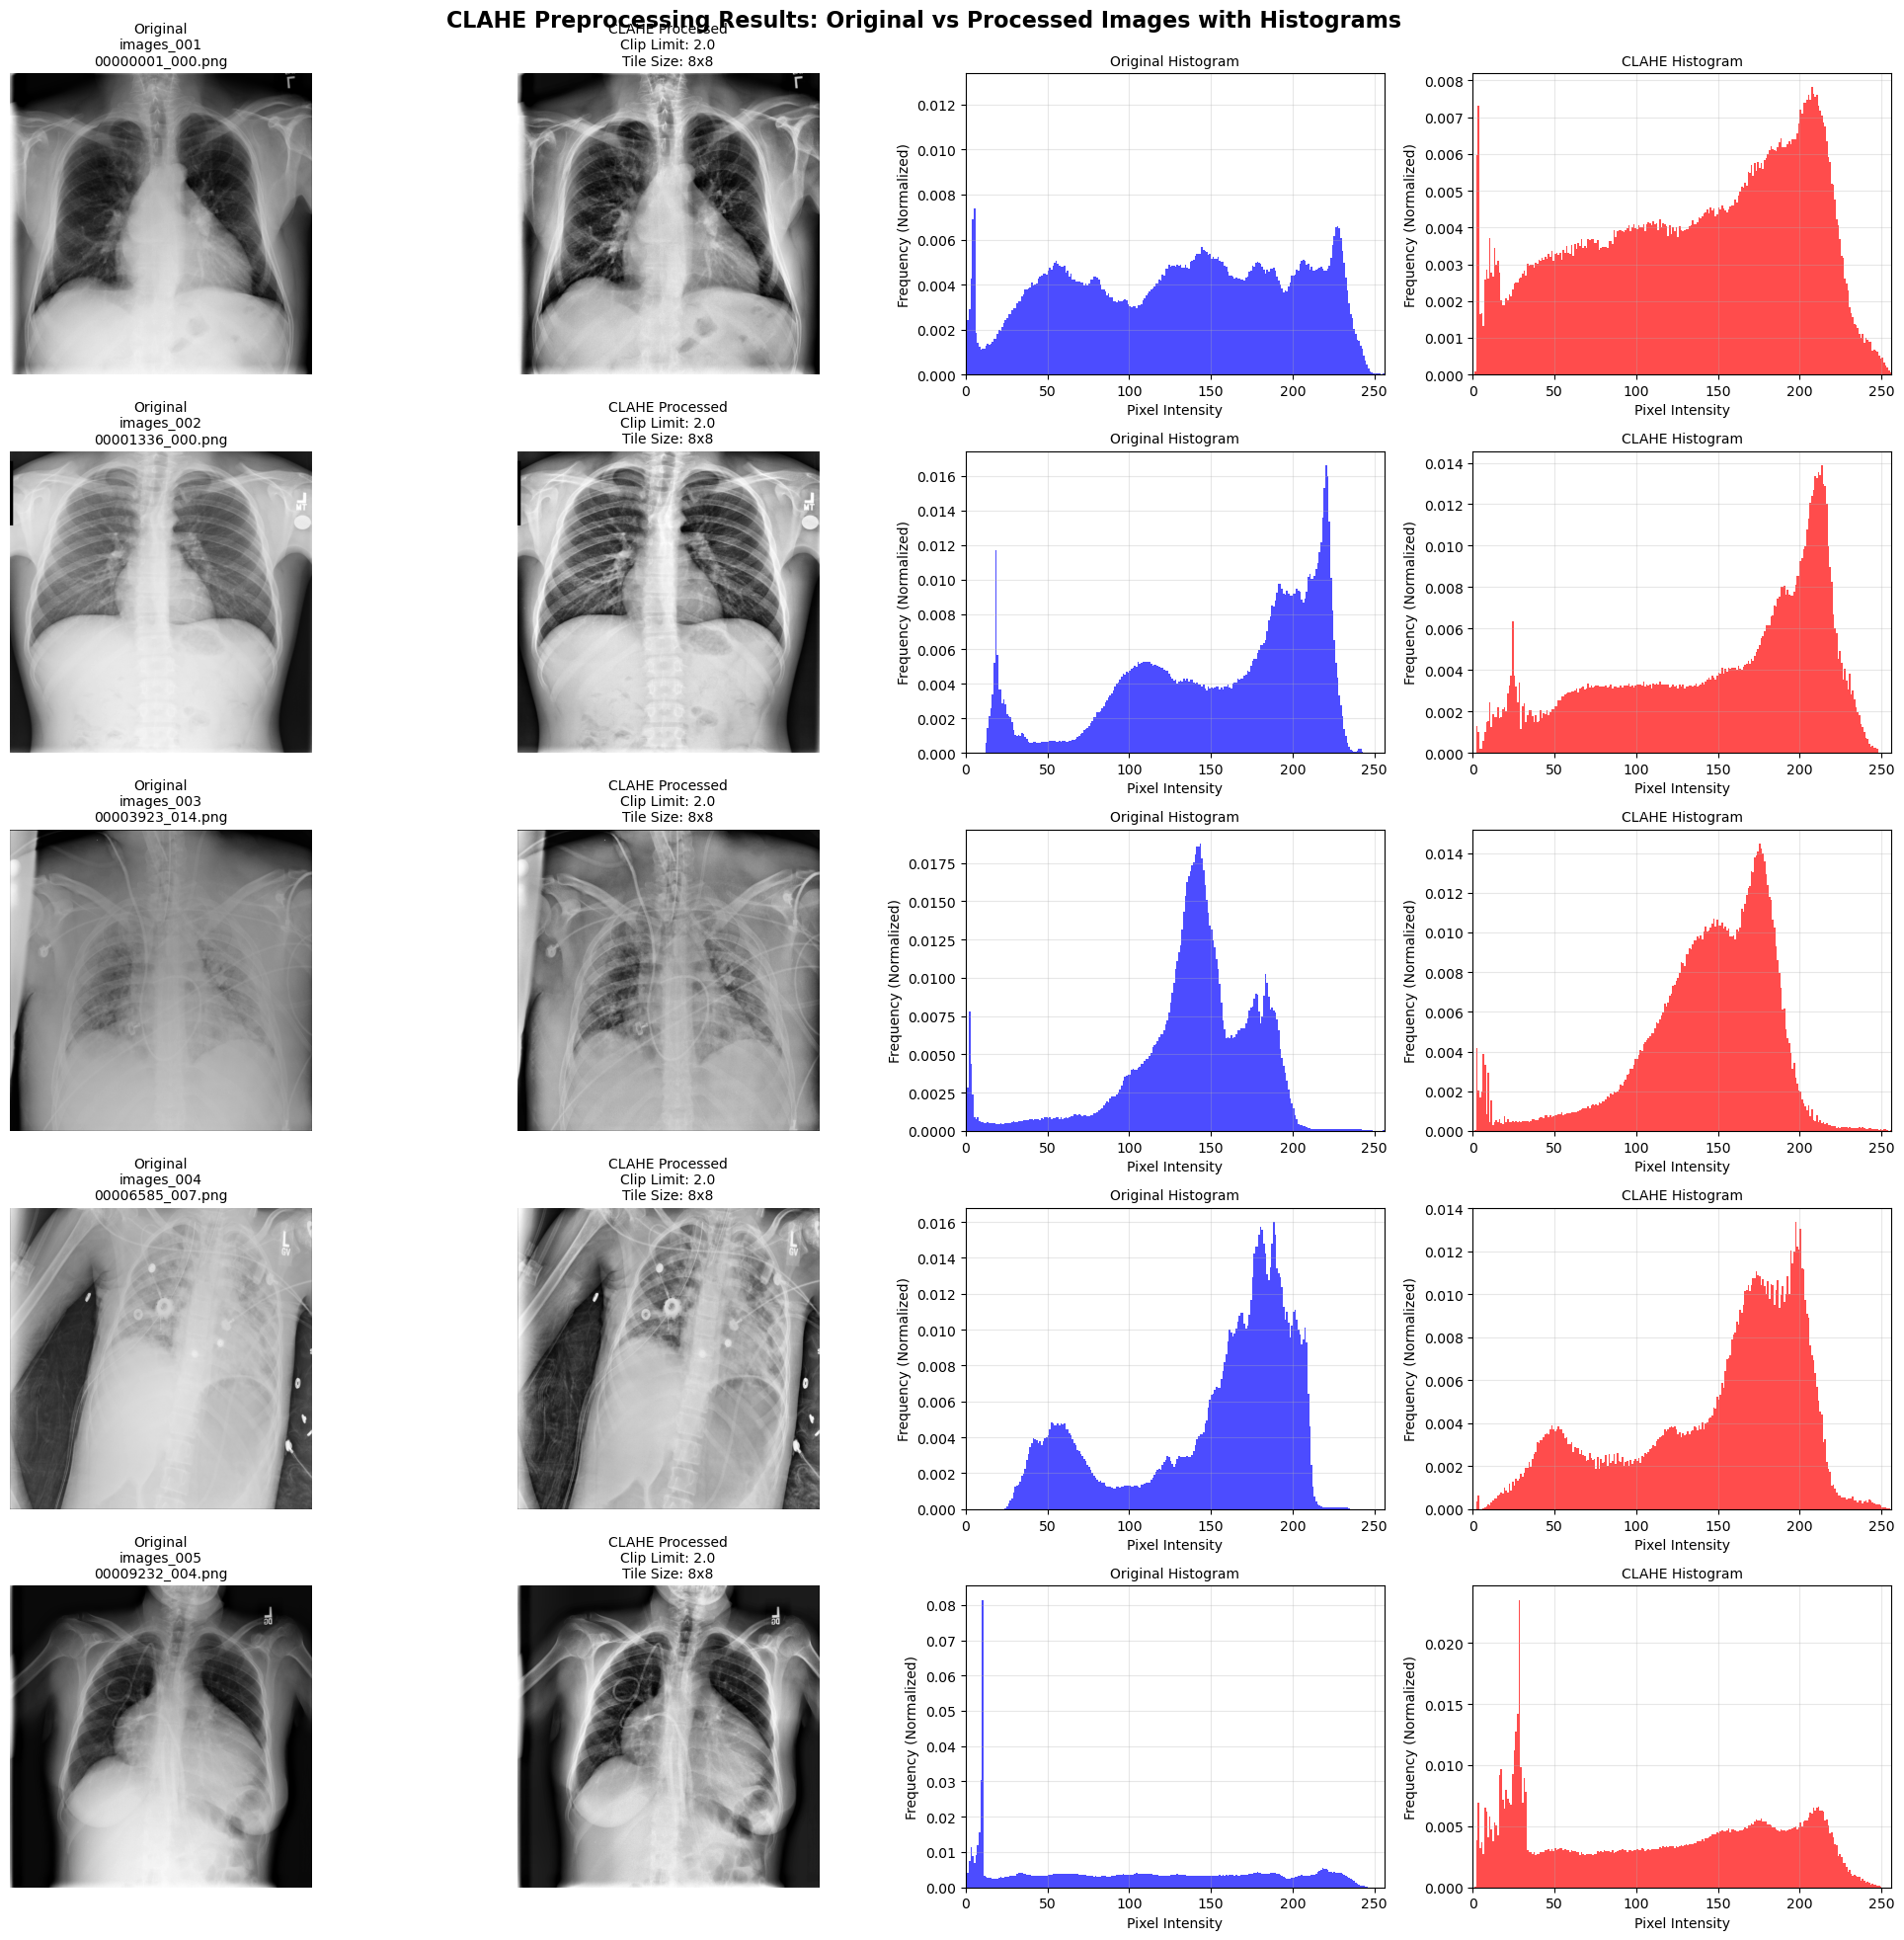

True

In [7]:
# Enhanced Visualization: Show 5 sample results with Original vs CLAHE + Histograms
def show_enhanced_clahe_comparison(num_samples=5):
    """
    Show comprehensive comparison of original vs CLAHE processed images with histograms
    """
    print("Creating enhanced visualization with histograms...")
    
    # Collect sample images from different directories
    sample_images = []
    for i, dir_info_item in enumerate(dir_info[:5]):  # Take from first 5 directories
        dir_name = dir_info_item['directory']
        input_path = dir_info_item['path']
        
        # Get first image from this directory
        png_files = glob.glob(os.path.join(input_path, "*.png"))
        if png_files:
            sample_images.append({
                'path': png_files[0],
                'directory': dir_name,
                'filename': os.path.basename(png_files[0])
            })
    
    # Create the visualization
    fig, axes = plt.subplots(num_samples, 4, figsize=(20, 4*num_samples))
    fig.suptitle('CLAHE Preprocessing Results: Original vs Processed Images with Histograms', 
                 fontsize=16, fontweight='bold')
    
    for i, sample in enumerate(sample_images):
        # Read original image
        original = cv2.imread(sample['path'], cv2.IMREAD_GRAYSCALE)
        
        # Apply CLAHE preprocessing
        processed = apply_clahe_preprocessing(sample['path'])
        
        if original is not None and processed is not None:
            # Plot original image
            axes[i, 0].imshow(original, cmap='gray')
            axes[i, 0].set_title(f'Original\n{sample["directory"]}\n{sample["filename"]}', fontsize=10)
            axes[i, 0].axis('off')
            
            # Plot CLAHE processed image
            axes[i, 1].imshow(processed, cmap='gray')
            axes[i, 1].set_title(f'CLAHE Processed\nClip Limit: 2.0\nTile Size: 8x8', fontsize=10)
            axes[i, 1].axis('off')
            
            # Plot original histogram
            axes[i, 2].hist(original.ravel(), bins=256, range=[0, 256], alpha=0.7, color='blue', density=True)
            axes[i, 2].set_title('Original Histogram', fontsize=10)
            axes[i, 2].set_xlim([0, 256])
            axes[i, 2].set_xlabel('Pixel Intensity')
            axes[i, 2].set_ylabel('Frequency (Normalized)')
            axes[i, 2].grid(True, alpha=0.3)
            
            # Plot CLAHE histogram
            axes[i, 3].hist(processed.ravel(), bins=256, range=[0, 256], alpha=0.7, color='red', density=True)
            axes[i, 3].set_title('CLAHE Histogram', fontsize=10)
            axes[i, 3].set_xlim([0, 256])
            axes[i, 3].set_xlabel('Pixel Intensity')
            axes[i, 3].set_ylabel('Frequency (Normalized)')
            axes[i, 3].grid(True, alpha=0.3)
            
            # Print statistics
            print(f"\n{sample['directory']} - {sample['filename']}:")
            print(f"  Original: mean={original.mean():.1f}, std={original.std():.1f}, range=[{original.min()}, {original.max()}]")
            print(f"  CLAHE:    mean={processed.mean():.1f}, std={processed.std():.1f}, range=[{processed.min()}, {processed.max()}]")
            print(f"  Contrast improvement: {(processed.std()/original.std()):.2f}x")
    
    plt.tight_layout()
    plt.show()
    
    return True

# Run the enhanced visualization
print("="*70)
print("COMPREHENSIVE CLAHE ANALYSIS")
print("="*70)
show_enhanced_clahe_comparison(5)

In [8]:
# Save 5 separate CLAHE sample images (each file contains: original, CLAHE, original histogram, CLAHE histogram)
import os

def save_clahe_sample_images(num_samples=5, samples_output_dir=None):
    """
    Save `num_samples` separate PNGs. Each PNG shows:
      - Original image (top-left)
      - CLAHE processed image (top-right)
      - Original histogram (bottom-left)
      - CLAHE histogram (bottom-right)

    Files are written to `samples_output_dir` (default: <output_base_path>/samples/).
    """
    if samples_output_dir is None:
        samples_output_dir = os.path.join(output_base_path, "samples")
    os.makedirs(samples_output_dir, exist_ok=True)

    saved_files = []
    # Choose samples: first image from the first `num_samples` directories (fallback within directories)
    chosen = []
    for dir_info_item in dir_info:
        if len(chosen) >= num_samples:
            break
        png_files = glob.glob(os.path.join(dir_info_item['path'], "*.png"))
        if png_files:
            chosen.append({
                'dir': dir_info_item['directory'],
                'path': png_files[0],
                'filename': os.path.basename(png_files[0])
            })

    if not chosen:
        print("No sample images found to save.")
        return []

    for i, sample in enumerate(chosen[:num_samples]):
        orig = cv2.imread(sample['path'], cv2.IMREAD_GRAYSCALE)
        proc = apply_clahe_preprocessing(sample['path'])
        if orig is None or proc is None:
            print(f"Skipping {sample['path']} (could not read/process)")
            continue

        # Build figure for this single sample - now with 2x3 layout to include combined histogram
        fig, axes = plt.subplots(2, 3, figsize=(15, 8))
        fig.suptitle(f"{sample['dir']} - {sample['filename']}", fontsize=14)

        # Original image
        axes[0, 0].imshow(orig, cmap='gray')
        axes[0, 0].set_title('Original Image')
        axes[0, 0].axis('off')

        # CLAHE processed image
        axes[0, 1].imshow(proc, cmap='gray')
        axes[0, 1].set_title('CLAHE Processed')
        axes[0, 1].axis('off')

        # Combined overlay histogram with legend
        axes[0, 2].hist(orig.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.5, density=True, label='Original')
        axes[0, 2].hist(proc.ravel(), bins=256, range=[0, 256], color='red', alpha=0.5, density=True, label='CLAHE')
        axes[0, 2].set_title('Combined Histogram Overlay')
        axes[0, 2].set_xlim([0, 256])
        axes[0, 2].set_xlabel('Pixel Intensity')
        axes[0, 2].set_ylabel('Density')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)

        # Original histogram (density) - separate
        axes[1, 0].hist(orig.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7, density=True)
        axes[1, 0].set_title('Original Histogram')
        axes[1, 0].set_xlim([0, 256])
        axes[1, 0].set_xlabel('Pixel Intensity')
        axes[1, 0].set_ylabel('Density')
        axes[1, 0].grid(True, alpha=0.3)

        # CLAHE histogram (density) - separate
        axes[1, 1].hist(proc.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7, density=True)
        axes[1, 1].set_title('CLAHE Histogram')
        axes[1, 1].set_xlim([0, 256])
        axes[1, 1].set_xlabel('Pixel Intensity')
        axes[1, 1].set_ylabel('Density')
        axes[1, 1].grid(True, alpha=0.3)

        # Statistics and contrast improvement info
        axes[1, 2].axis('off')
        stats_text = f"""Statistics:
        
Original:
  Mean: {orig.mean():.1f}
  Std: {orig.std():.1f}
  Range: [{orig.min()}, {orig.max()}]

CLAHE:
  Mean: {proc.mean():.1f}
  Std: {proc.std():.1f}
  Range: [{proc.min()}, {proc.max()}]

Contrast Improvement: {(proc.std()/orig.std()):.2f}x
        """
        axes[1, 2].text(0.05, 0.95, stats_text, transform=axes[1, 2].transAxes, 
                        fontsize=10, verticalalignment='top', fontfamily='monospace',
                        bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        out_name = f"sample_{i+1:02d}_{sample['dir']}_{sample['filename']}.png"
        out_path = os.path.join(samples_output_dir, out_name)
        fig.savefig(out_path, bbox_inches='tight', dpi=150)
        plt.close(fig)

        saved_files.append(out_path)
        print(f"Saved sample visualization: {out_path}")
        # print brief stats
        print(f"  Original mean={orig.mean():.1f}, std={orig.std():.1f}; CLAHE mean={proc.mean():.1f}, std={proc.std():.1f}")

    return saved_files

# Execute saving of 5 separate sample images
print('Saving 5 separate CLAHE sample images to samples folder...')
saved = save_clahe_sample_images(5)
print('\nSaved files:')
for f in saved:
    print(' -', f)

Saving 5 separate CLAHE sample images to samples folder...
Saved sample visualization: ./processed_images/data\samples\sample_01_images_001_00000001_000.png.png
  Original mean=128.1, std=67.4; CLAHE mean=134.4, std=65.2
Saved sample visualization: ./processed_images/data\samples\sample_01_images_001_00000001_000.png.png
  Original mean=128.1, std=67.4; CLAHE mean=134.4, std=65.2
Saved sample visualization: ./processed_images/data\samples\sample_02_images_002_00001336_000.png.png
  Original mean=155.7, std=58.7; CLAHE mean=149.9, std=63.5
Saved sample visualization: ./processed_images/data\samples\sample_02_images_002_00001336_000.png.png
  Original mean=155.7, std=58.7; CLAHE mean=149.9, std=63.5
Saved sample visualization: ./processed_images/data\samples\sample_03_images_003_00003923_014.png.png
  Original mean=137.5, std=40.8; CLAHE mean=142.4, std=41.5
Saved sample visualization: ./processed_images/data\samples\sample_03_images_003_00003923_014.png.png
  Original mean=137.5, std=40

In [9]:
# FULL PROCESSING - Process all 112,120 images with CLAHE
# WARNING: This will take a significant amount of time and disk space!

print("Ready to process ALL images with CLAHE!")
print(f"Total images to process: {total_count}")
print("This will take a considerable amount of time...")


# Start full processing
full_processed, full_failed = process_all_images_with_clahe(
    directory_info=dir_info,
    clip_limit=2.0,
    tile_grid_size=(8, 8),
    sample_only=False  # Process ALL images
)

#Verify all processed images
final_count = verify_processed_images()

Ready to process ALL images with CLAHE!
Total images to process: 112120
This will take a considerable amount of time...
Starting CLAHE processing...
Parameters: clip_limit=2.0, tile_grid_size=(8, 8)

Processing images_001...
  Processing 4999 images from images_001

Processing images_002...
  Processing 10000 images from images_002

Processing images_002...
  Processing 10000 images from images_002

Processing images_003...
  Processing 10000 images from images_003

Processing images_003...
  Processing 10000 images from images_003

Processing images_004...
  Processing 10000 images from images_004

Processing images_004...
  Processing 10000 images from images_004

Processing images_005...
  Processing 10000 images from images_005

Processing images_005...
  Processing 10000 images from images_005

Processing images_006...
  Processing 10000 images from images_006

Processing images_006...
  Processing 10000 images from images_006

Processing images_007...
  Processing 10000 images fr